# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
from google.colab import files
import re
from collections import Counter
import pandas as pd
uploaded=files.upload()
# preprocess text and extract N-grams
def preprocess_and_extract_ngrams(text, n):
    # Preprocess text by removing punctuation and converting to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    words = text.split()

    # Extract N-grams
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]

    return ngrams

# load the data
df = pd.read_csv('imdb_reviews_cleaned.csv')

# Count the frequency of all the N-grams (N=3)
all_ngrams = []
for text in df['Cleaned Review']:
    ngrams = preprocess_and_extract_ngrams(text, 3)
    all_ngrams.extend(ngrams)

ngram_counts = Counter(all_ngrams)

print("Frequency of all trigrams:")
for ngram, count in ngram_counts.items():
    print(f"{ngram}: {count}")

# Calculate the probabilities for all the bigrams
bigram_probs = {}
for ngram in ngram_counts.keys():
    if len(ngram) == 2:
        prefix = ngram[0]
        bigram_probs[ngram] = ngram_counts[ngram] / ngram_counts[(prefix,)]

print("\nProbabilities for all bigrams:")
for bigram, prob in bigram_probs.items():
    print(f"{bigram}: {prob}")

# Extract all the noun phrases
noun_phrases = []
for text in df['Cleaned Review']:
    nouns = re.findall(r'\b(?:NN\w*|JJ\w*|VB\w*)\b', text)  # Extract nouns, adjectives, and verbs
    noun_phrases.append(' '.join(nouns))

# Calculate the relative probabilities of each review in terms of other reviews
noun_phrase_freq = Counter(noun_phrases)
max_freq = max(noun_phrase_freq.values())
relative_probs = {phrase: freq / max_freq for phrase, freq in noun_phrase_freq.items()}

# Print the result in a table
print("\nRelative probabilities of each review in terms of other reviews:")
print("Review\t\t\t\t\t", "\t\t".join(noun_phrase_freq.keys()))
for i, text in enumerate(df['Cleaned Review']):
    print(f"Review {i+1}:", end="\t")
    for phrase, freq in noun_phrase_freq.items():
        print(f"{relative_probs[phrase]:.2f}\t", end="")
    print()


Streaming output truncated to the last 5000 lines.
('web', 'accomplish', 'detail'): 1
('accomplish', 'detail', 'shot'): 1
('detail', 'shot', 'serv'): 1
('shot', 'serv', 'public'): 1
('serv', 'public', 'give'): 1
('public', 'give', 'littl'): 1
('give', 'littl', 'charact'): 1
('littl', 'charact', 'develop'): 1
('charact', 'develop', 'itther'): 1
('develop', 'itther', 'great'): 1
('itther', 'great', 'avenu'): 1
('great', 'avenu', 'taken'): 1
('avenu', 'taken', 'help'): 1
('taken', 'help', 'ingrain'): 1
('help', 'ingrain', 'part'): 1
('ingrain', 'part', 'stori'): 1
('part', 'stori', 'medic'): 1
('stori', 'medic', 'nerd'): 1
('medic', 'nerd', 'insid'): 1
('nerd', 'insid', 'found'): 1
('insid', 'found', 'cool'): 1
('found', 'cool', 'littl'): 1
('cool', 'littl', 'nod'): 1
('littl', 'nod', 'sequencessom'): 1
('nod', 'sequencessom', 'artist'): 1
('sequencessom', 'artist', 'visual'): 1
('artist', 'visual', 'cool'): 1
('visual', 'cool', 'im'): 1
('cool', 'im', 'sucker'): 1
('im', 'sucker', 'good'

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import math
import pandas as pd

# load the data
df = pd.read_csv('imdb_reviews_cleaned.csv')

# preprocess text
def preprocess_text(text):
    # Convert text to lowercase and remove punctuation
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Preprocess all reviews
df['Cleaned Review'] = df['Cleaned Review'].apply(preprocess_text)

# calculate term frequency (TF)
def calculate_tf(text):
    words = text.split()
    word_count = Counter(words)
    total_words = len(words)
    tf = {word: count / total_words for word, count in word_count.items()}
    return tf

# calculate inverse document frequency (IDF)
def calculate_idf(documents):
    total_documents = len(documents)
    word_documents = {}
    for document in documents:
        for word in set(document.split()):
            word_documents[word] = word_documents.get(word, 0) + 1
    idf = {word: math.log(total_documents / (count + 1)) for word, count in word_documents.items()}
    return idf

# build TF-IDF matrix
def build_tfidf_matrix(documents):
    tfidf_matrix = []
    idf = calculate_idf(documents)
    for document in documents:
        tf = calculate_tf(document)
        tfidf_vector = [tf[word] * idf.get(word, 0) for word in tf.keys()]  # Use get() to handle missing words
        tfidf_matrix.append(tfidf_vector)
    return tfidf_matrix

# calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = sum(x * y for x, y in zip(vector1, vector2))
    magnitude1 = math.sqrt(sum(x**2 for x in vector1))
    magnitude2 = math.sqrt(sum(y**2 for y in vector2))
    return dot_product / (magnitude1 * magnitude2)

# Define a query
query = "An Outstanding movie with a haunting performance and best character development"
query = preprocess_text(query)

# Build TF-IDF matrix
tfidf_matrix = build_tfidf_matrix(df['Cleaned Review'])

# Calculate IDF for the entire corpus
idf = calculate_idf(df['Cleaned Review'])

# Calculate cosine similarity between query and documents
similarities = []
query_vector = calculate_tf(query)
query_tfidf_vector = [query_vector[word] * idf.get(word, 0) for word in query_vector.keys()]  # Use get() to handle missing words
for tfidf_vector in tfidf_matrix:
    similarity = cosine_similarity(query_tfidf_vector, tfidf_vector)
    similarities.append(similarity)

# Rank documents based on cosine similarity
ranked_documents = sorted(zip(df['Cleaned Review'], similarities), key=lambda x: x[1], reverse=True)

# Print the ranked documents
print("Ranked Documents:")
for i, (document, similarity) in enumerate(ranked_documents, start=1):
    print(f"Rank {i}: Similarity = {similarity:.4f}, Document = {document}")


Ranked Documents:
Rank 1: Similarity = 0.2098, Document = beekeep one dumb stupid action movi ridicul dumb yet still strong part director david ayer isnt filmmak realli like enjoy work like train day end watch previou movi tax collector absolut atroci beekeep slightli better last moviemani action thrill stunt moment scene ridicul part wellexecut shot pretti well although mix poor edit bad use cgi perform okay jason statham still play still fun aspect movi narr pretti ridicul kind dumb think dumber becom style definit take bit much influenc john wick seri dialogu quit laughabl hey enjoy moment clearli doesnt take serious action thrill statham pretti fun
Rank 2: Similarity = 0.1975, Document = one worst movi ive ever seen would walk hadnt paid disappoint mani peopl im fan cant rememb laugh one time entir movi didnt see twist come movi even good nowher near enough come close save movi im john cena fan even close worst part movi there post credit scene came walk didnt even bother go back w

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

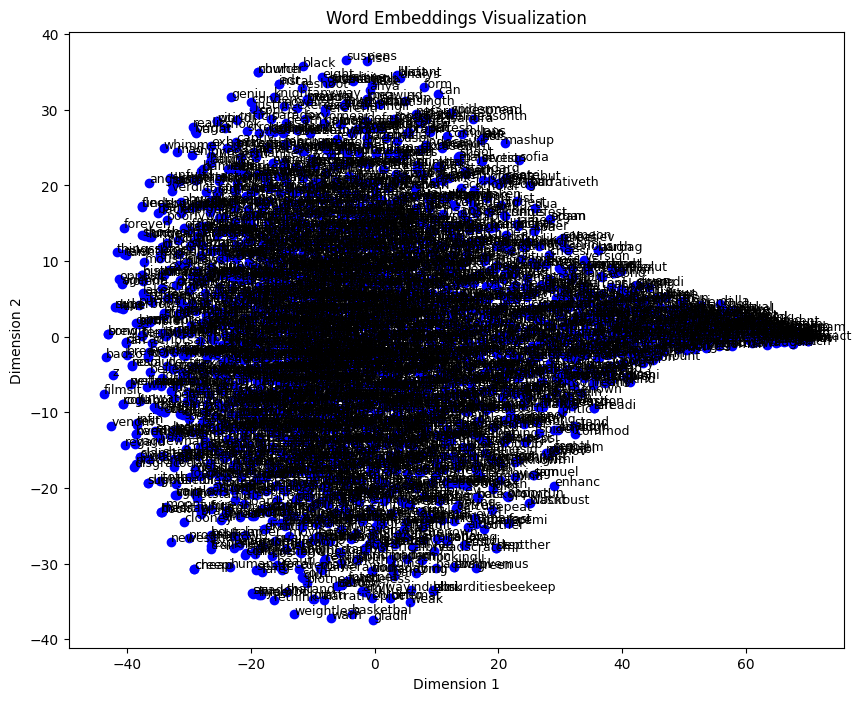

In [ ]:
# Write your code here

import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
df = pd.read_csv('imdb_reviews_cleaned.csv')

# Preprocess the text
preprocessed_reviews = [review.split() for review in df['Cleaned Review']]

# Train Word2Vec model
embedding_dim = 300
word2vec_model = Word2Vec(sentences=preprocessed_reviews, vector_size=embedding_dim, window=5, min_count=1, workers=4)

# Visualize the word embeddings
words = list(word2vec_model.wv.index_to_key)
word_vectors = word2vec_model.wv[words]

# Reduce dimensionality for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# Plot the word embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = word_vectors_tsne[i]
    plt.scatter(x, y, marker='o', color='b')
    plt.text(x, y, word, fontsize=9)
plt.title('Word Embeddings Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''The assignment was quite good the only thing that was I found challenging was creating my own word embedding model.
However, though research  i created it and visualized using a scatter plot. i enjoyed conducting N-gram analysis on movie reviews dataset'''

'The assignment was quite good the only thing that was I found challenging was creating my own word embedding model.\nHowever, though research  i created it and visualized using a scatter plot. i enjoyed conducting N-gram analysis on movie reviews dataset'